# 로지스틱 회귀

## 럭키백의 확률

In [ ]:
path = '/content/drive/MyDrive/Fish.csv'

In [ ]:
import pandas as pd
fish = pd.read_csv(path)
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
print(fish['Species'].unique())

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [ ]:
fish_input = fish[['Weight','Length2','Length3','Height','Width']].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [ ]:
fish_target = fish['Species'].to_numpy()
print(fish_target[:5])

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input,fish_target)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_target)
print(kn.score(train_scaled,train_target))
print(kn.score(test_scaled,test_target))

0.8907563025210085
0.85


In [ ]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Pike' 'Perch' 'Perch' 'Smelt']


In [ ]:
print(test_target[:5])

['Perch' 'Pike' 'Perch' 'Perch' 'Smelt']


In [ ]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=4))

[[0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]]


In [ ]:
print(test_scaled[3])
print(test_scaled[3:4])

[-0.41478744 -0.06831693 -0.1940944  -0.42979774  0.09479911]
[[-0.41478744 -0.06831693 -0.1940944  -0.42979774  0.09479911]]


In [ ]:
_, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Perch' 'Perch' 'Perch']]


## 로지스틱 회귀

In [ ]:
import math
def sigmoid(x):
  return 1/(1+math.exp(-x))

In [ ]:
xs = [x for x in np.arange(-5,5,0.1)]
ys = [sigmoid(x) for x in xs]

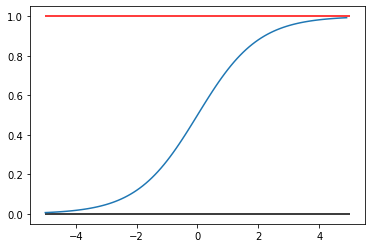

In [ ]:
import matplotlib.pyplot as plt
plt.plot(xs,ys)
#plt.vlines(0,-2,2)
plt.hlines(0,-5,5)
plt.hlines(1,-5,5,colors='r')
plt.show()

## 로지스틱회귀 이진분류

In [ ]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
bream_smelt_indexes2 = (test_target == 'Bream') | (test_target == 'Smelt')
test_bream_smelt = test_scaled[bream_smelt_indexes2]
test_target_bream_smelt = test_target[bream_smelt_indexes2]

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() # 모델 생성
lr.fit(train_bream_smelt, target_bream_smelt) #공부해

LogisticRegression()

In [ ]:
lr.predict(test_bream_smelt)

array(['Smelt', 'Smelt', 'Bream', 'Smelt', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object)

In [ ]:
print(test_target_bream_smelt)

['Smelt' 'Smelt' 'Bream' 'Smelt' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream'
 'Bream' 'Smelt' 'Bream' 'Bream']


In [ ]:
print(lr.classes_)

['Bream' 'Smelt']


In [ ]:
print(lr.coef_,lr.intercept_)

[[-0.45280171 -0.59868618 -0.66841802 -0.90713877 -0.75684873]] [-2.16008244]


In [ ]:
decisions = lr.decision_function(test_bream_smelt[:5])
print(decisions)

[ 3.83249521  3.69075802 -2.58798504  3.46855096 -2.05813873]


In [ ]:
for d in decisions:
  print(f'{sigmoid(d):.2f}',end = " ")

0.98 0.98 0.07 0.97 0.11 

In [ ]:
res = lr.predict(test_bream_smelt[:5])
print(res)

['Smelt' 'Smelt' 'Bream' 'Smelt' 'Bream']


## 로지스틱 회귀를 이용한 다중 분류

소프트맥스 함수는 여러개의 선형 방정식의 출력값을 0~1사이로 압축하고 전체 합이 1이 되도록만듬

In [ ]:
lr = LogisticRegression()
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.8151260504201681
0.825


In [ ]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Pike' 'Perch' 'Perch' 'Smelt']


In [ ]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.023 0.    0.864 0.014 0.008 0.    0.091]
 [0.009 0.011 0.231 0.527 0.18  0.006 0.036]
 [0.09  0.003 0.673 0.058 0.035 0.    0.141]
 [0.015 0.022 0.681 0.032 0.186 0.001 0.061]
 [0.    0.035 0.096 0.    0.035 0.833 0.001]]


In [ ]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
print(lr.coef_)

[[-0.12182033 -0.06639256  0.71404178  2.92777068 -0.22708628]
 [-0.46126435 -0.77902831 -0.74232438  2.09518583 -0.82631191]
 [ 1.25156502  0.36370804 -1.4395475  -1.91164217  1.68675124]
 [-0.05245411  1.66065602  1.6738818  -1.24128372 -0.56804802]
 [-0.80951006 -0.47557741  0.38598864 -0.51698705  0.71540019]
 [-0.35193963 -0.67822505 -0.65556522 -1.28537655 -1.69637632]
 [ 0.54542346 -0.02514073  0.06352489 -0.06766701  0.9156711 ]]


In [ ]:
print(lr.intercept_)

[ 0.42031171  0.05507416  2.16263466 -0.24274379  1.00000299 -3.99020912
  0.59492939]


In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [ ]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision,decimals=2))

[[ 1.79 -2.77  5.43  1.34  0.76 -9.74  3.18]
 [-1.58 -1.46  1.61  2.43  1.36 -2.12 -0.24]
 [ 1.71 -1.72  3.72  1.27  0.75 -7.88  2.15]
 [-0.94 -0.54  2.88 -0.18  1.58 -3.28  0.47]
 [-5.22  1.47  2.48 -2.93  1.47  4.64 -1.91]]


In [ ]:
from scipy.special import softmax
proba = softmax(decision, axis =1)
print(np.round(proba, decimals=3))

[[0.023 0.    0.864 0.014 0.008 0.    0.091]
 [0.009 0.011 0.231 0.527 0.18  0.006 0.036]
 [0.09  0.003 0.673 0.058 0.035 0.    0.141]
 [0.015 0.022 0.681 0.032 0.186 0.001 0.061]
 [0.    0.035 0.096 0.    0.035 0.833 0.001]]


## 확률적 경사 하강법
확률적 경사하강법 : 1개씩 꺼내서 경사 하강

미니배치 경사 하강법 : 무작위로 여러개의 샘플을 사용해 경사 하강법을 수행

배치 경사 하강법 : 몽땅 꺼내 경사하강


In [ ]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', random_state=42) # loss='log', max_iter=10
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.773109243697479
0.825


In [ ]:
sc.partial_fit(train_scaled,train_target)
print(sc.score(train_scaled,train_target))
print(sc.score(test_scaled,test_target))

0.9159663865546218
0.925


In [ ]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score =[]
test_score = []
classes = np.unique(train_target)

In [ ]:
for _ in range(0,300):
  sc.partial_fit(train_scaled,train_target,classes=classes)
  train_score.append(sc.score(train_scaled,train_target))
  test_score.append(sc.score(test_scaled,test_target))

<function matplotlib.pyplot.show>

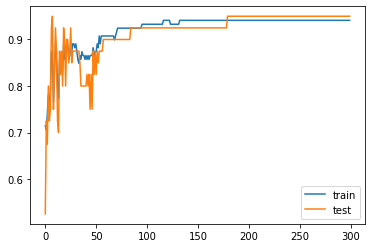

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_score,label='train')
plt.plot(test_score,label='test')
plt.legend()
plt.show

#결정 트리

## 결정트리

In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/wine2.csv'
wine = pd.read_csv(path)
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
wine['class'].unique()

array([0., 1.])

In [ ]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()
data.shape, target.shape

((6497, 3), (6497,))

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data,target,test_size=0.2,random_state=42)
train_input.shape, test_input.shape

((5197, 3), (1300, 3))

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled= ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# train_scaled = train_input
# test_scaled = test_input

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.7808350971714451
0.7776923076923077


In [ ]:
print(lr.coef_,lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_input,train_target)
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))

0.996921300750433
0.8569230769230769


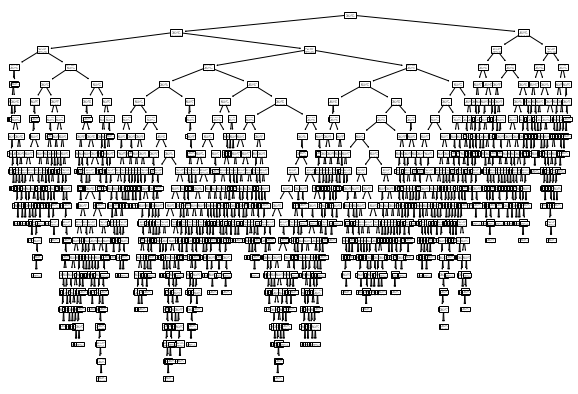

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

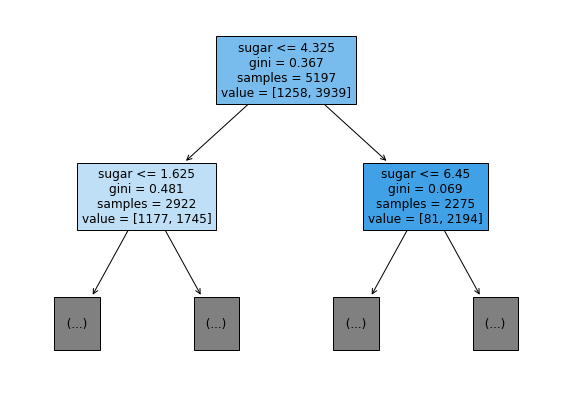

In [ ]:
# plt.figure(figsize=(10,7))
# plot_tree(dt,max_depth=1,filled=True,feature_names['alcohol','sugar','pH'])
# plt.show()
plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=1,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()


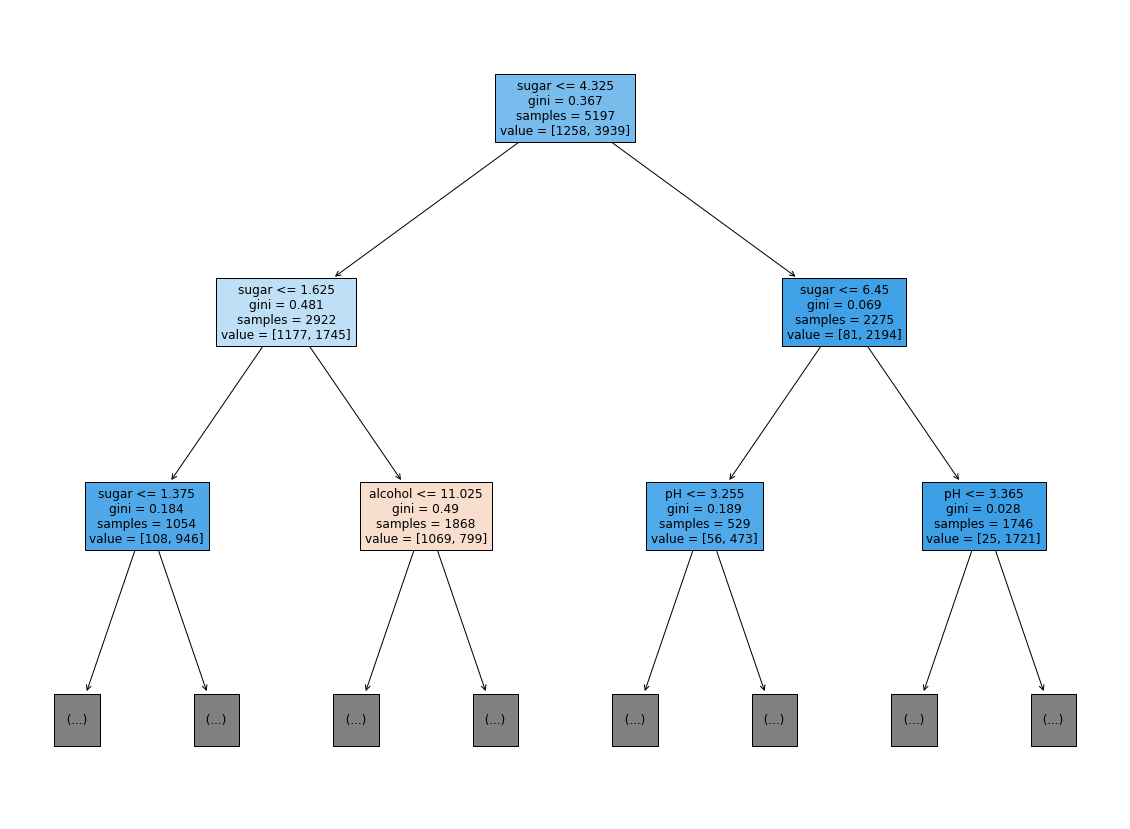

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt,max_depth=2,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

In [ ]:
print(dt.feature_importances_)

[0.22941157 0.52201331 0.24857511]


## 가지치기

In [ ]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(sub_input,sub_target)
print(dt.score(train_scaled,train_target))
print(dt.score(test_input,test_target))

0.6707715989994227
0.8415384615384616


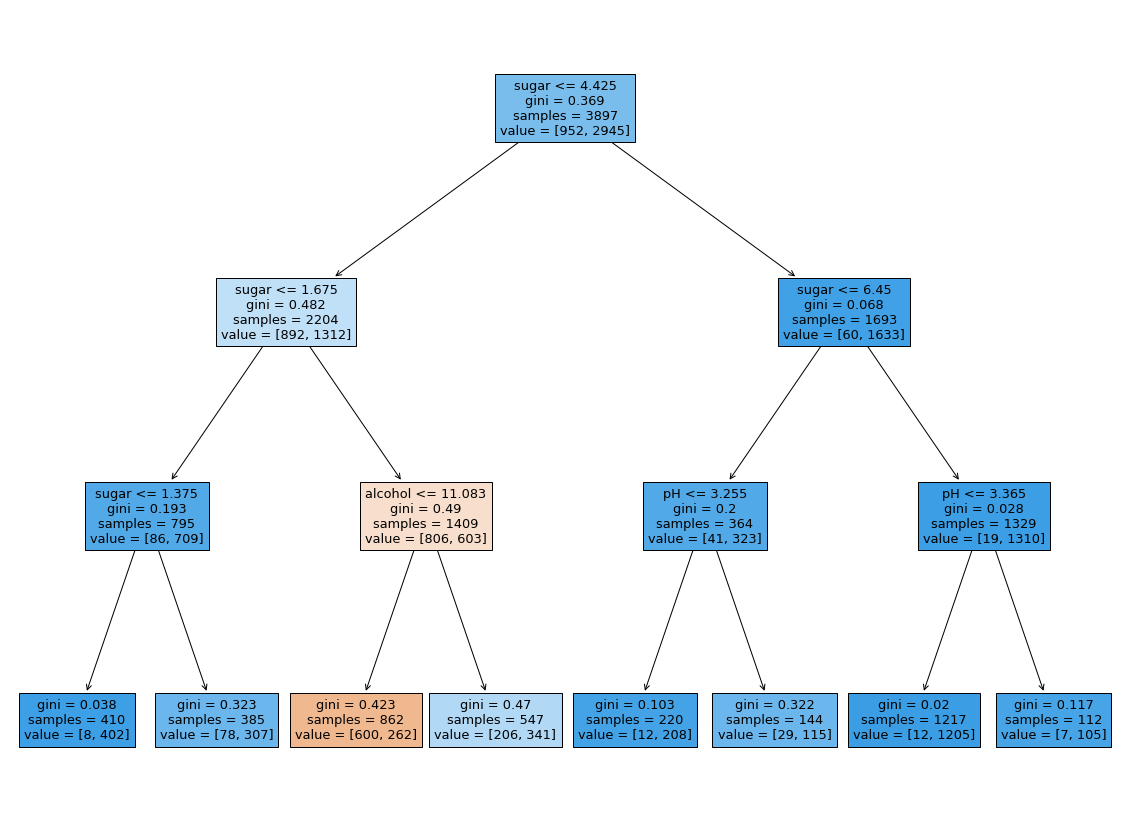

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt,filled=True,feature_names=['alcohol','sugar','pH'])
plt.show()

## 교차 검증과 그리드 서치

###검증세트

In [ ]:
sub_input, val_input, sub_target, val_target = train_test_split(train_input,train_target)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(sub_input,sub_target)
print(dt.score(sub_input,sub_target))
print(dt.score(val_input,val_target))
print(dt.score(test_input,test_target))

0.842442904798563
0.8507692307692307
0.8415384615384616


### 하이퍼파라미터 튜닝


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease':[0.0001,0.001,0.01,0.1,0.2]}
gs = GridSearchCV(DecisionTreeClassifier(),params,n_jobs=-1) # n_job는 cpu코어수 지정
gs.fit(train_input,train_target)
dt = gs.best_estimator_
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))


0.9611314219742159
0.8676923076923077


In [ ]:
print(gs.best_params_)

{'min_impurity_decrease': 0.0001}


In [ ]:
print(gs.cv_results_['mean_test_score'])

[0.86723088 0.86165044 0.84164082 0.75793737 0.75793737]


In [ ]:
params ={
    'min_impurity_decrease':[0.0001,0.001,0.01,0.1,0.2],
    'max_depth' : range(5,20),
    'min_samples_split' : range(2,100,10)
}

In [ ]:
gs = GridSearchCV(DecisionTreeClassifier(),params,n_jobs=-1) # n_job는 cpu코어수 지정
gs.fit(train_input,train_target)
dt = gs.best_estimator_
print(dt.score(train_input,train_target))
print(dt.score(test_input,test_target))

0.9526649990379065
0.8684615384615385


In [ ]:
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0001, 'min_samples_split': 2}


## 트리의 앙상블
정형 : csv, excel, DB

반정형 : json,xml,html

비정형 : text문서, 영상, 이미지

### 랜덤 포레스트

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1)
scores = cross_validate(rf,train_input,train_target,return_train_score=True)
print(scores)

{'fit_time': array([2.03326368, 0.631706  , 0.62243485, 0.56157565, 0.40005898]), 'score_time': array([0.10419178, 0.10338306, 0.10290861, 0.10285401, 0.10243845]), 'test_score': array([0.88557692, 0.88365385, 0.91049086, 0.88739172, 0.88354187]), 'train_score': array([0.9971133 , 0.99639163, 0.998076  , 0.997595  , 0.9978355 ])}


In [ ]:
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.9974022849894872 0.8901310431628044


In [ ]:
rf.fit(train_input,train_target)
print(rf.feature_importances_)

[0.23030633 0.50045068 0.26924298]


In [ ]:
print(rf.score(train_input,train_target))
print(rf.score(test_input,test_target))

0.996921300750433
0.8853846153846154
